#Importing Necessary Libraries and Loading the Dataset

In [34]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#Acessing google drive from google colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Loading the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Dissertation/ZHM.csv')

#Data Cleaning and PreProcessing

In [37]:
#showing the first few data from the dataset
df.head()

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI
0,2017-01-02 00:00:00,162.0,230.0,128.0,18.0,2.3,27.0,212.0
1,2017-01-02 01:00:00,162.0,230.0,128.0,18.0,2.3,27.0,212.0
2,2017-01-02 02:00:00,162.0,230.0,128.0,18.0,2.3,27.0,212.0
3,2017-01-02 03:00:00,162.0,230.0,128.0,18.0,2.3,27.0,212.0
4,2017-01-02 04:00:00,156.5,219.5,123.0,18.0,2.2,29.0,206.5


In [38]:
#shape of data
df.shape

(35040, 8)

In [39]:
#showing all the columns in dataset
df.columns

Index(['pubtime', 'PM2.5', 'PM10', 'NO2', 'O3', 'CO', 'SO2', 'AQI'], dtype='object')

In [40]:
#showing overall information of whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pubtime  35040 non-null  object 
 1   PM2.5    35040 non-null  float64
 2   PM10     35040 non-null  float64
 3   NO2      35040 non-null  float64
 4   O3       35040 non-null  float64
 5   CO       35040 non-null  float64
 6   SO2      35040 non-null  float64
 7   AQI      35040 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.1+ MB


In [41]:
#showing the descriptive statistics of whole Dataset
df.describe()

,PM2.5,PM10,NO2,O3,CO,SO2,AQI
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,38.710924,69.343559,43.808095,65.447962,0.881120,12.221237,65.993193
std,31.539575,45.944918,26.777590,50.440051,0.403825,13.997214,37.757436
min,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,5.000000
25%,18.000000,38.000000,24.000000,27.000000,0.600000,6.000000,42.000000
50%,31.000000,58.125000,36.625000,56.000000,0.800000,9.000000,58.000000
75%,50.000000,89.000000,57.000000,91.000000,1.100000,14.000000,79.000000
max,331.000000,527.000000,188.000000,526.000000,6.300000,292.000000,427.000000


In [42]:
#checking all the unique values that are present in a dataset
df.nunique()

pubtime    35040
PM2.5       1353
PM10        2110
NO2         1088
O3          1406
CO           576
SO2          677
AQI         1297
dtype: int64

To perform the analysis and different machine learning model, last six month data was extraxted from the dataset.

In [43]:
df['pubtime'] = pd.to_datetime(df['pubtime'])

# start and end dates
start_date = pd.Timestamp('2020-06-30')
end_date = pd.Timestamp('2020-12-31')

# Filtering the DataFrame based on date
df = df[(df['pubtime'] >= start_date) & (df['pubtime'] <= end_date)]
df

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI
30600,2020-06-30 00:00:00,11.0,23.0,26.0,70.0,0.7,5.0,23.0
30601,2020-06-30 01:00:00,14.0,23.0,29.0,54.0,0.8,5.0,23.0
30602,2020-06-30 02:00:00,11.0,23.0,31.0,48.0,0.7,5.0,23.0
30603,2020-06-30 03:00:00,12.0,25.0,42.0,26.0,0.7,5.0,25.0
30604,2020-06-30 04:00:00,7.0,29.0,36.0,22.0,0.7,5.0,29.0
...,...,...,...,...,...,...,...,...
35012,2020-12-30 20:00:00,21.0,59.0,35.0,42.0,0.8,6.0,55.0
35013,2020-12-30 21:00:00,22.0,65.0,35.0,40.0,0.8,6.0,58.0
35014,2020-12-30 22:00:00,26.0,64.0,30.0,43.0,0.8,6.0,57.0
35015,2020-12-30 23:00:00,24.0,58.0,30.0,42.0,0.8,6.0,54.0


In [44]:
df.shape

(4417, 8)

So the new dataset will have the spahe of 4417 column and 8 rows.

In [45]:
#reindex the order in chronological order
df = df.reindex(index = df.index[::1]).reset_index(drop=True)
df

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI
0,2020-06-30 00:00:00,11.0,23.0,26.0,70.0,0.7,5.0,23.0
1,2020-06-30 01:00:00,14.0,23.0,29.0,54.0,0.8,5.0,23.0
2,2020-06-30 02:00:00,11.0,23.0,31.0,48.0,0.7,5.0,23.0
3,2020-06-30 03:00:00,12.0,25.0,42.0,26.0,0.7,5.0,25.0
4,2020-06-30 04:00:00,7.0,29.0,36.0,22.0,0.7,5.0,29.0
...,...,...,...,...,...,...,...,...
4412,2020-12-30 20:00:00,21.0,59.0,35.0,42.0,0.8,6.0,55.0
4413,2020-12-30 21:00:00,22.0,65.0,35.0,40.0,0.8,6.0,58.0
4414,2020-12-30 22:00:00,26.0,64.0,30.0,43.0,0.8,6.0,57.0
4415,2020-12-30 23:00:00,24.0,58.0,30.0,42.0,0.8,6.0,54.0


In [46]:
#checking all the unique values that are present in a selected range of data
df.nunique()

pubtime    4417
PM2.5       220
PM10        246
NO2         194
O3          295
CO           87
SO2          67
AQI         289
dtype: int64

##Checking Null Values

In [47]:
# Check for missing values
print(df.isnull().sum())

pubtime    0
PM2.5      0
PM10       0
NO2        0
O3         0
CO         0
SO2        0
AQI        0
dtype: int64


##Checking Duplicate Values

In [48]:
#Checking duplicated data
df.loc[df.duplicated()]

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI


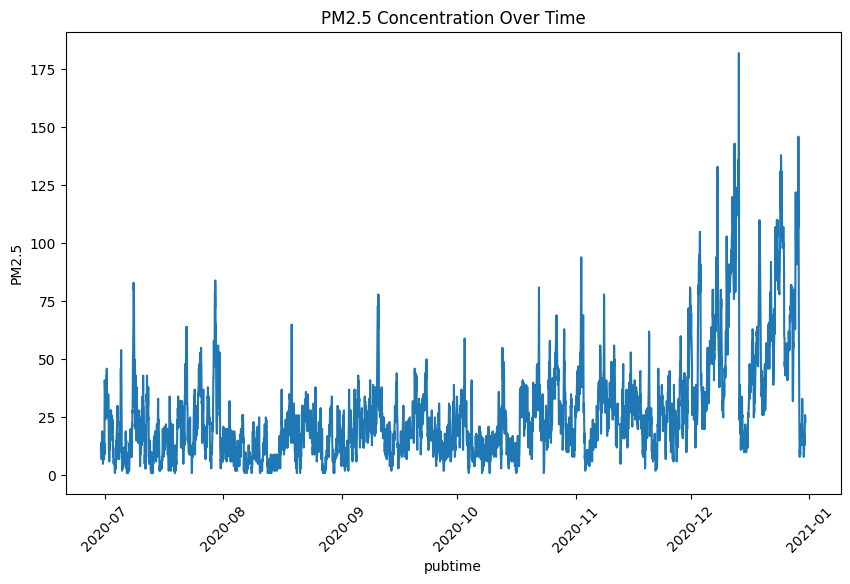

In [49]:
# Question 1. How does the PM2.5 concentration vary over time?
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='pubtime', y='PM2.5')
plt.xticks(rotation=45)
plt.title('PM2.5 Concentration Over Time')
plt.show()

During the mid of December, it shows that the PM2.5 concentrations was recorded highest
which is almost  175 and in whole December month it was recorded high as compared to the previous months.

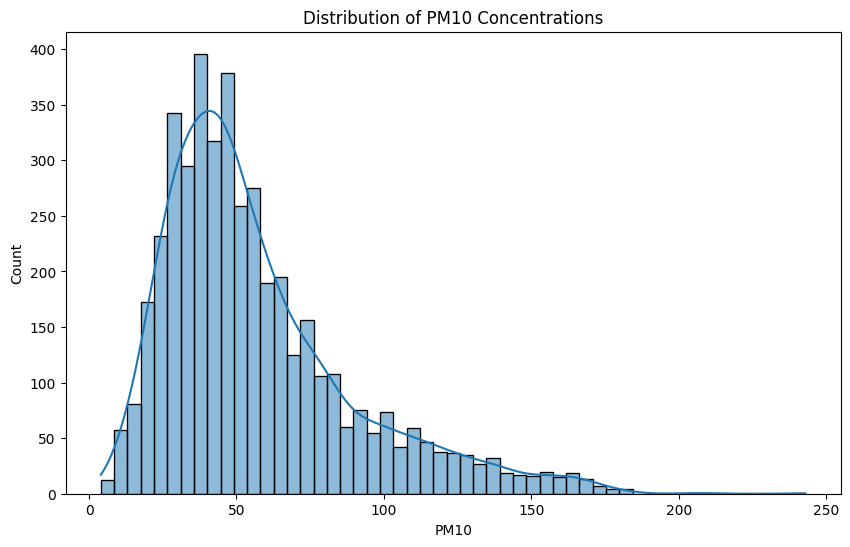

In [50]:
# Question 2. What is the distribution of PM10 concentrations?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PM10', kde=True)
plt.title('Distribution of PM10 Concentrations')
plt.show()



Histogram plot show the PM10 concentrations is skewed to right, where lower concentrations are occurring more frequently than higher concentrations. This suggest that the majority of observation fall in lower concentration range as long tail is extending towards higher values.

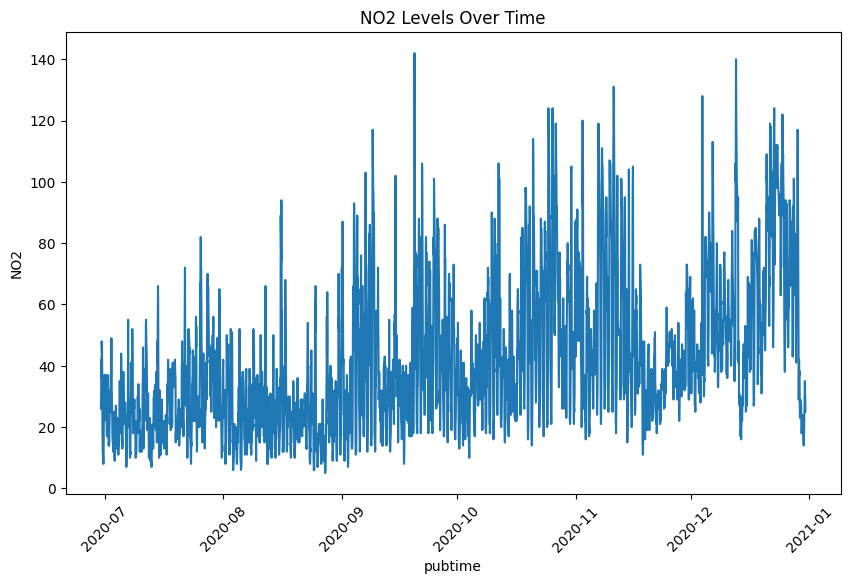

In [51]:
# Question 3. How does the NO2 levels change over time?
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='pubtime', y='NO2')
plt.xticks(rotation=45)
plt.title('NO2 Levels Over Time')
plt.show()

Line plot shows that the level of NO2 was fluctuated throughout the different month. Sometime it goes to maximum and sometime it goes to minimum.

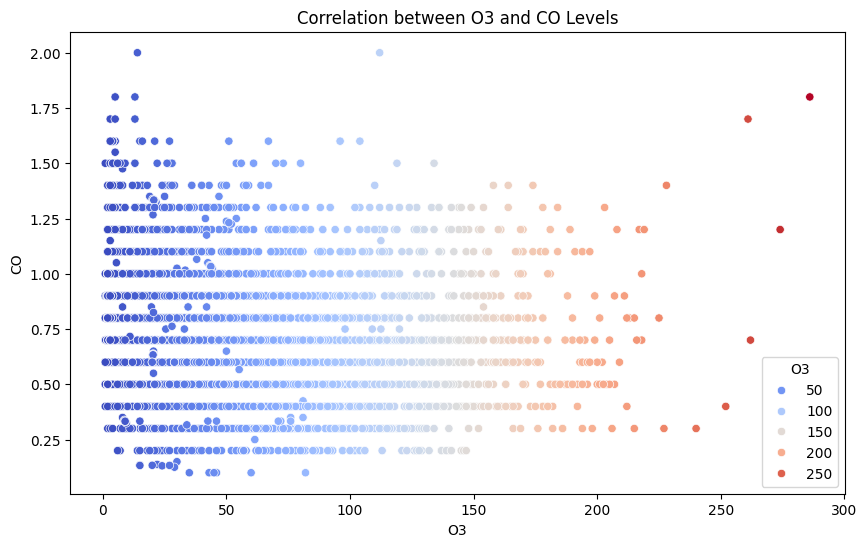

In [52]:
# Question 4. Is there any correlation between O3 and CO levels?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='O3', y='CO', hue='O3', palette='coolwarm')
plt.title('Correlation between O3 and CO Levels')
plt.show()

It show correlation between O3 and CO levels through scatter plot where, each point on plot represent the observed data having X-axis as O3 level and Y-axis as CO level. It shows weak negative correlation and due to the point spread around the trends line it can be state that relationship between CO and O3 is not particularly strong.

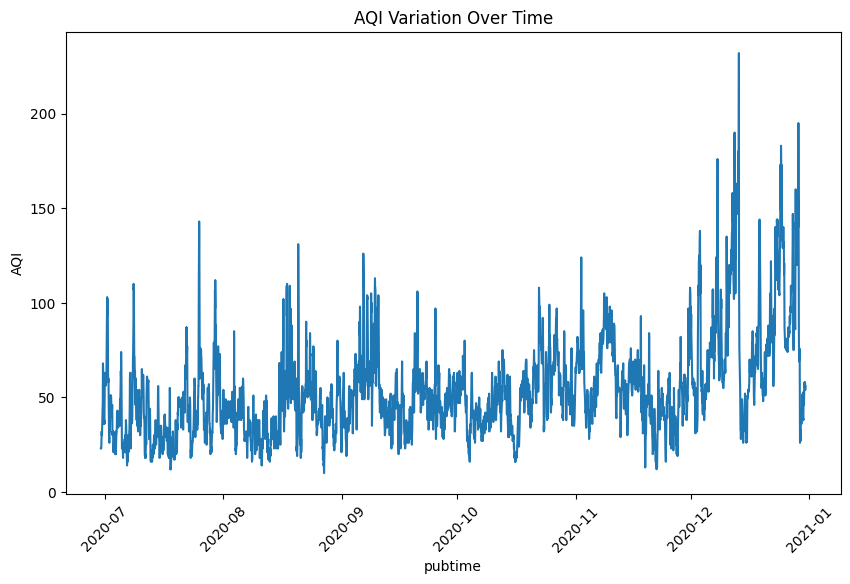

In [53]:
# Question 5. How does  AQI vary across different times?
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='pubtime', y='AQI')
plt.xticks(rotation=45)
plt.title('AQI Variation Over Time')
plt.show()

During the mid of December, it shows that the AQI was recorded highest which is more than 200 and in whole December month it was recorded high as compared to the previous months.

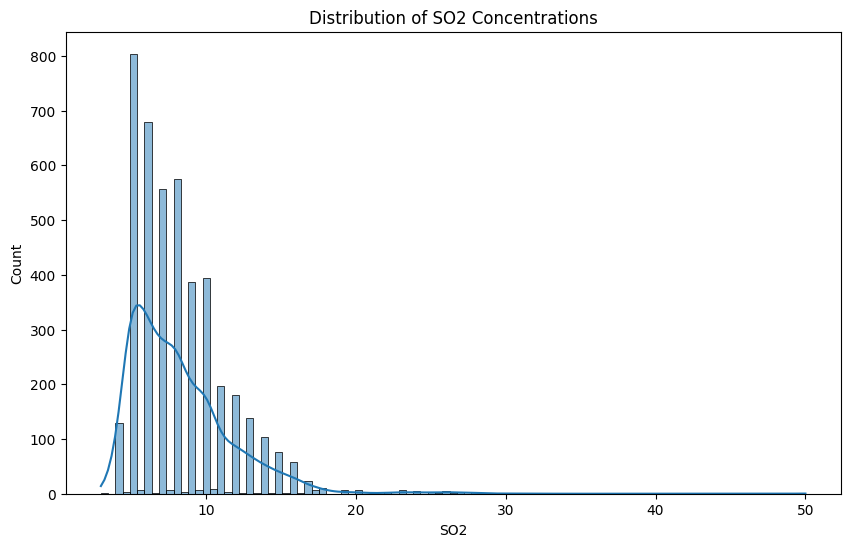

In [54]:
# Question 6. What is the distribution of SO2 concentrations?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SO2', kde=True)
plt.title('Distribution of SO2 Concentrations')
plt.show()

Histogram plot show the SO2 concentrations is skewed to right, where lower concentrations are occurring more frequently than higher concentrations. This suggest that the majority of observation fall in lower concentration range as long tail is extending towards higher values

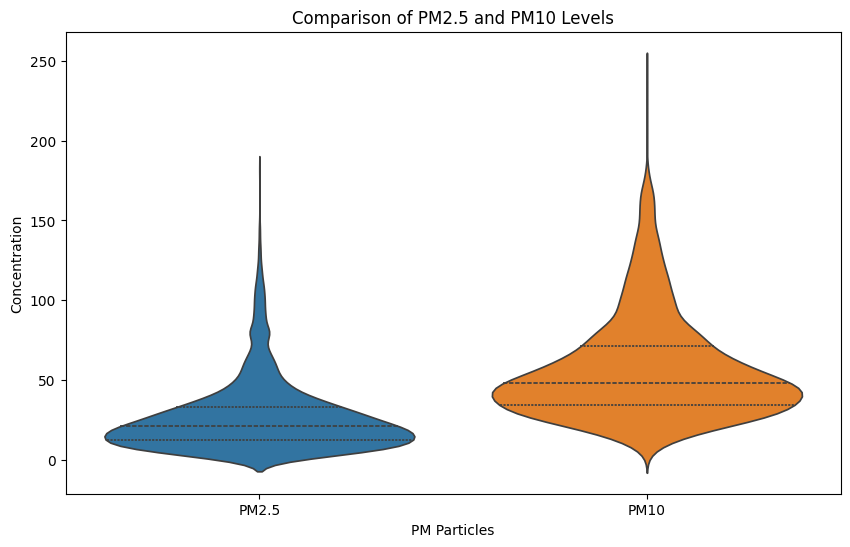

In [55]:
# Question 7. How do PM2.5 and PM10 levels compare?
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['PM2.5', 'PM10']], inner="quartile")
plt.title('Comparison of PM2.5 and PM10 Levels')
plt.xlabel('PM Particles')
plt.ylabel('Concentration')
plt.show()


Plot show the comparison of PM2.5 and PM10 through violin plot. Each violin represent the observed data with particular particles where width of each violin show the frequency of observation at different concentrations level. Each quartile represents by the horizontal line drawn inside the violin plot.

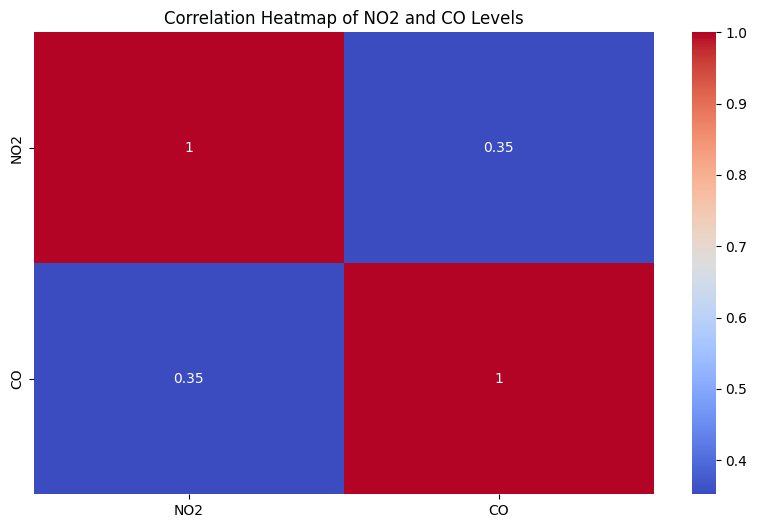

In [56]:
#Question 8. How do NO2 and CO levels vary spatially?
plt.figure(figsize=(10, 6))
sns.heatmap(data=df[['NO2', 'CO']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of NO2 and CO Levels')
plt.show()

Plot show the correlation Heatmap of NO2 and CO levels where correlations coefficient is 0.35 between these two gases which can be state as moderate positive correlation. This suggest that with higher concentration of CO tend to exhibit higher concentration of NO2 and vice versa.

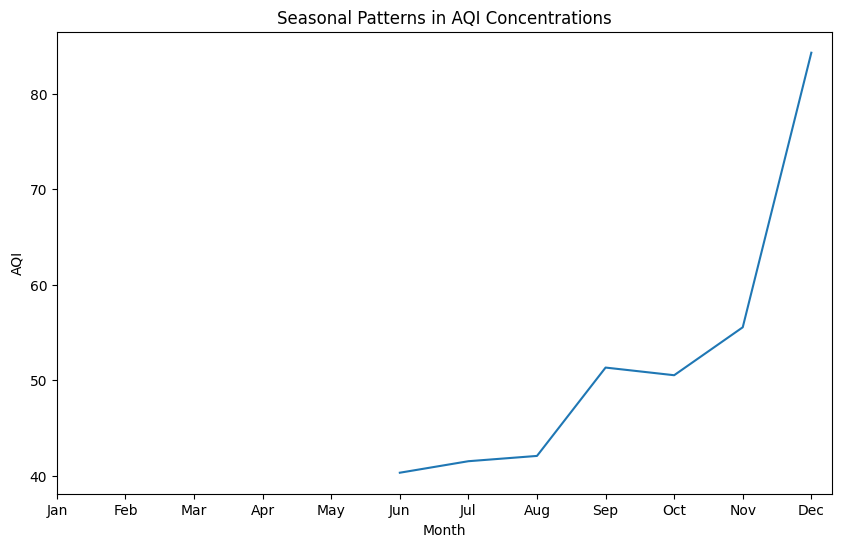

In [57]:
# Question 9. IS there any seasonal patterns in AQI concentrations?

#Extract month temporarily for visualization
temp_df = df.copy()
temp_df['Month'] = temp_df['pubtime'].dt.month

#plotting Sesonal pattern
plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_df, x='Month', y='AQI', estimator='mean', err_style=None)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonal Patterns in AQI Concentrations')
plt.show()


Plot show the seasonal patterns in AQI concentrations through the line plot. X-axis show the all the month of the year, where Y-axis show the mean of AQI. From the plot it can stated that AQI was slightly increased from June to November and after that it was sky-rocketing and reach the highest level

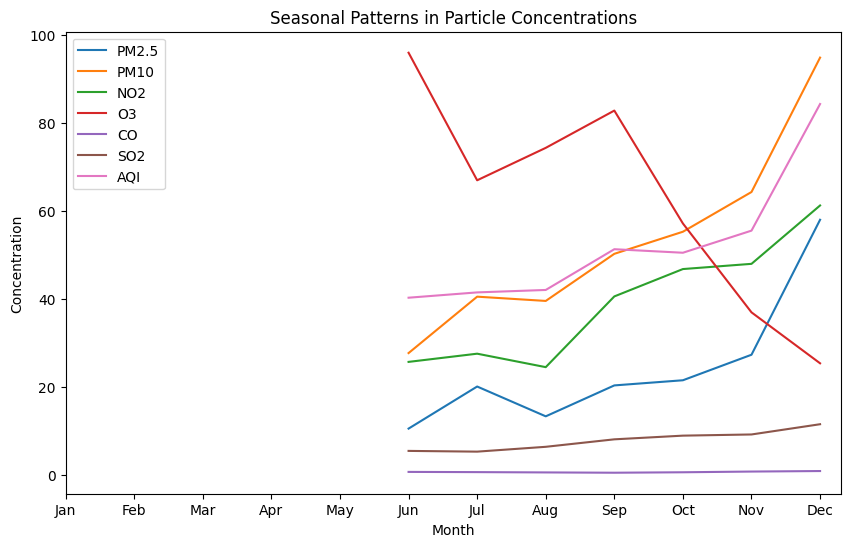

In [60]:
# Question 10. IS there any seasonal patterns in all variable?
# Extract month temporarily for visualization
temp_df = df.copy()
temp_df['Month'] = temp_df['pubtime'].dt.month

# Plotting seasonal patterns for all particles
plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_df, x='Month', y='PM2.5', estimator='mean', err_style=None, label='PM2.5')
sns.lineplot(data=temp_df, x='Month', y='PM10', estimator='mean', err_style=None, label='PM10')
sns.lineplot(data=temp_df, x='Month', y='NO2', estimator='mean', err_style=None, label='NO2')
sns.lineplot(data=temp_df, x='Month', y='O3', estimator='mean', err_style=None, label='O3')
sns.lineplot(data=temp_df, x='Month', y='CO', estimator='mean', err_style=None, label='CO')
sns.lineplot(data=temp_df, x='Month', y='SO2', estimator='mean', err_style=None, label='SO2')
sns.lineplot(data=temp_df, x='Month', y='AQI', estimator='mean', err_style=None, label='AQI')


plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonal Patterns in Particle Concentrations')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.legend()
plt.show()


Plot show the seasonal patterns in all seven variables (PM22.5, PM10, NO2, O3, CO, SO2, AQI) with the help of line graph distributed all the month on X-axis and particles concentration on Y-axis. From the graph it can be state that concentration of AQI, PM2.5, PM10, and NO2 was increased in each month towards the ends of year, and O3 concentration was moving downwards in each month towards the ends of year. Whereas the concentration of CO and SO2 was almost same throughout each month.

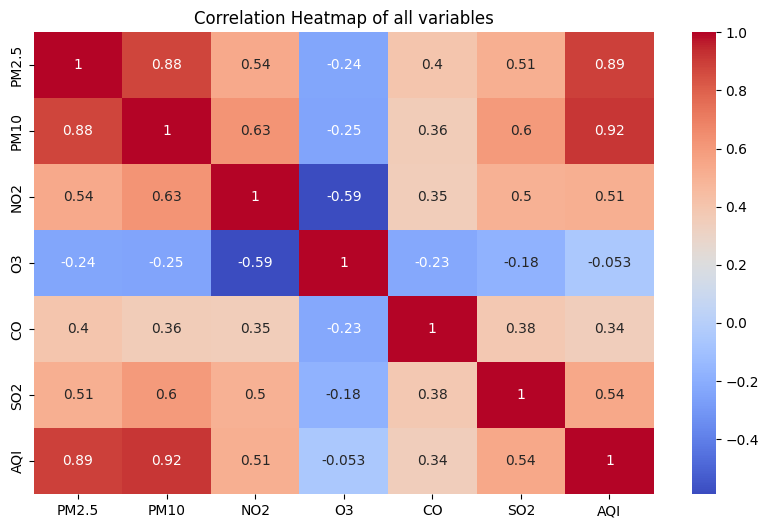

In [61]:
#Question 10. How do NO2 and CO levels vary spatially?
plt.figure(figsize=(10, 6))
sns.heatmap(data=df[['PM2.5','PM10','NO2','O3', 'CO','SO2','AQI']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of all variables')
plt.show()

Plot show the correlation Heatmap of all variables levels. Positive correlations are indicated by warmer color red whereas, negative correlations are indicated by cooler color blue. Correlation coefficient closer to 1 indicate the stronger correlation between two variable whereas negative or coefficient close to 0 indicate the weak relationship between two variables.

In [62]:
#File path to save the data
file_path = '/content/drive/MyDrive/Dissertation/clean_data.csv'

# Save DataFrame to CSV file
df.to_csv(file_path, index=False)

print("CSV file saved to Google Drive!")

CSV file saved to Google Drive!


In [ ]:
# Loading the clean dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Dissertation/clean_data.csv')
df.head()

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI
0,2020-06-30 00:00:00,11.0,23.0,26.0,70.0,0.7,5.0,23.0
1,2020-06-30 01:00:00,14.0,23.0,29.0,54.0,0.8,5.0,23.0
2,2020-06-30 02:00:00,11.0,23.0,31.0,48.0,0.7,5.0,23.0
3,2020-06-30 03:00:00,12.0,25.0,42.0,26.0,0.7,5.0,25.0
4,2020-06-30 04:00:00,7.0,29.0,36.0,22.0,0.7,5.0,29.0


In [63]:
df.shape

(4417, 8)